# GPUの計算順序を固定

In [ ]:
# 学習結果に再現性を持たせるため
import tensorflow as tf
import numpy as np
import random
import os

def set_seed(seed=200):
    tf.random.set_seed(seed)

    # optional
    # for numpy.random
    np.random.seed(seed)
    # for built-in random
    random.seed(seed)
    # for hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
set_seed(200)

# トリミング関数　定義

In [ ]:
import os
from PIL import Image
import numpy as np
from PIL import ImageFile
from keras.preprocessing.image import array_to_img

In [ ]:
#入力：画像,トリミングサイズ縦(km)、トリミングサイズ横(km)
def crop_center(img, crop_width, crop_height):
    crop_width = (crop_width*512)/2600
    crop_height = (crop_height*512)/2600
    img_width, img_height, channels = img.shape
    return img[int((img_height - crop_height) / 2):int((img_height + crop_height) / 2),
            int((img_width - crop_width) / 2):int((img_width + crop_width) / 2)]

# 1300km, 1400km, 1500km

# データの準備

＜トレーニング：2005~2014年＞
急速発達（ラベル1）19件

　　　　　　　　　　　　　　　通常発達（ラベル0）46件

＜テスト：2015~2016年＞
1: 05件

　　　　　　　　　　　　0: 18件

In [ ]:
import glob
from keras.utils import np_utils

# 強度クラスは2つ
classes = ["RI", "NORMAL"]
num_classes = len(classes)
img_size = (224, 224)

# データ格納用の空の配列
x_train_1300 = []
x_test_1300 = []
x_train_1400 = []
x_test_1400 = []
x_train_1500 = []
x_test_1500 = []
y_train_1300 = []
y_test_1300 = []
y_train_1400 = []
y_test_1400 = []
y_train_1500 = []
y_test_1500 = []
file_name_train_101112 = []
file_name_test_101112 = []


# 画像の読み込み(traindata)
for index, classlabel in enumerate(classes):
  dir = "/content/drive/MyDrive/Earth/randomforest/TRAIN/" + classlabel
  files = glob.glob(dir + "/*.jpg")

  file_name_train_101112.extend(files)  # ファイルパスの取得

  # 1300km
  for i, file in enumerate(files):
    img = Image.open(files[i])
    img = img.convert("RGB")
    # トリミング
    cropped_img = crop_center(img=np.array(img), crop_height=1300, crop_width=1300)
    # 224pxにリサイズ
    cropped_img = array_to_img(cropped_img)
    cropped_img = cropped_img.resize(img_size)
    cropped_img = np.array(cropped_img)
    y_train_1300.append(index)
    x_train_1300.append(cropped_img)


  # 1400km
  for i, file in enumerate(files):
    img = Image.open(files[i])
    img = img.convert("RGB")
    # トリミング
    cropped_img = crop_center(img=np.array(img), crop_height=1400, crop_width=1400)
    # 224pxにリサイズ
    cropped_img = array_to_img(cropped_img)
    cropped_img = cropped_img.resize(img_size)
    cropped_img = np.array(cropped_img)
    y_train_1400.append(index)
    x_train_1400.append(cropped_img)


  # 1500km
  for i, file in enumerate(files):
    img = Image.open(files[i])
    img = img.convert("RGB")
    # トリミング
    cropped_img = crop_center(img=np.array(img), crop_height=1500, crop_width=1500)
    # 224pxにリサイズ
    cropped_img = array_to_img(cropped_img)
    cropped_img = cropped_img.resize(img_size)
    cropped_img = np.array(cropped_img)
    y_train_1500.append(index)
    x_train_1500.append(cropped_img)
    
    
  print(index, ":OK(train)")



# 画像の読み込み(testdata)
for index, classlabel in enumerate(classes):
  dir = "/content/drive/MyDrive/Earth/randomforest/TEST/" + classlabel
  files = glob.glob( dir + "/*.jpg")

  file_name_test_101112.extend(files)  # ファイルパスの取得

  # 1300km
  for i, file in enumerate(files):
    img = Image.open(files[i])
    img = img.convert("RGB")
    # トリミング
    cropped_img = crop_center(img=np.array(img), crop_height=1300, crop_width=1300)
    # 224pxにリサイズ
    cropped_img = array_to_img(cropped_img)
    cropped_img = cropped_img.resize(img_size)
    cropped_img = np.array(cropped_img)
    y_test_1300.append(index)
    x_test_1300.append(cropped_img)


  # 1400km
  for i, file in enumerate(files):
    img = Image.open(files[i])
    img = img.convert("RGB")
    # トリミング
    cropped_img = crop_center(img=np.array(img), crop_height=1400, crop_width=1400)
    # 224pxにリサイズ
    cropped_img = array_to_img(cropped_img)
    cropped_img = cropped_img.resize(img_size)
    cropped_img = np.array(cropped_img)
    y_test_1400.append(index)
    x_test_1400.append(cropped_img)


  # 1500km
  for i, file in enumerate(files):
    img = Image.open(files[i])
    img = img.convert("RGB")
    # トリミング
    cropped_img = crop_center(img=np.array(img), crop_height=1500, crop_width=1500)
    # 224pxにリサイズ
    cropped_img = array_to_img(cropped_img)
    cropped_img = cropped_img.resize(img_size)
    cropped_img = np.array(cropped_img)
    y_test_1500.append(index)
    x_test_1500.append(cropped_img)
    
    
  print(index, ":OK(test)")



# numpy配列に変換
x_train_1300 = np.array(x_train_1300)
x_test_1300 = np.array(x_test_1300)
x_train_1400 = np.array(x_train_1400)
x_test_1400 = np.array(x_test_1400)
x_train_1500 = np.array(x_train_1500)
x_test_1500 = np.array(x_test_1500)

y_train_1300 = np.array(y_train_1300)
y_test_1300 = np.array(y_test_1300)
y_train_1400 = np.array(y_train_1400)
y_test_1400 = np.array(y_test_1400)
y_train_1500 = np.array(y_train_1500)
y_test_1500 = np.array(y_test_1500)
file_name_train_101112 = np.array(file_name_train_101112)
file_name_test_101112 = np.array(file_name_test_101112)

# 正規化
x_train_1300 = x_train_1300.astype("float32")/255.0
x_test_1300 = x_test_1300.astype("float32")/255.0
x_train_1400 = x_train_1400.astype("float32")/255.0
x_test_1400 = x_test_1400.astype("float32")/255.0
x_train_1500 = x_train_1500.astype("float32")/255.0
x_test_1500 = x_test_1500.astype("float32")/255.0

# one-hot vector化
y_train_1300 = np_utils.to_categorical(y_train_1300, num_classes)
y_test_1300 = np_utils.to_categorical(y_test_1300, num_classes)
y_train_1400 = np_utils.to_categorical(y_train_1400, num_classes)
y_test_1400 = np_utils.to_categorical(y_test_1400, num_classes)
y_train_1500 = np_utils.to_categorical(y_train_1500, num_classes)
y_test_1500 = np_utils.to_categorical(y_test_1500, num_classes)

0 :OK(train)
1 :OK(train)
0 :OK(test)
1 :OK(test)


# データ確認

In [ ]:
print(x_train_1300.shape, x_test_1300.shape,
      x_train_1400.shape, x_test_1400.shape,
      x_train_1500.shape, x_test_1500.shape)

(74, 224, 224, 3) (25, 224, 224, 3) (74, 224, 224, 3) (25, 224, 224, 3) (74, 224, 224, 3) (25, 224, 224, 3)


In [ ]:
# ラベル付き画像データをnpzファイルとして保存（ラベル付けは時間がかかるため）
np.savez("/content/drive/MyDrive/Earth/randomforest/Resize_img/Prediction_data_1300.npz",
         x_train=x_train_1300, x_test=x_test_1300, y_train=y_train_1300, y_test=y_test_1300, file_name_train=file_name_train_101112, file_name_test=file_name_test_101112)

In [ ]:
# ラベル付き画像データをnpzファイルとして保存（ラベル付けは時間がかかるため）
np.savez("/content/drive/MyDrive/Earth/randomforest/Resize_img/Prediction_data_1400.npz",
         x_train=x_train_1400, x_test=x_test_1400, y_train=y_train_1400, y_test=y_test_1400, file_name_train=file_name_train_101112, file_name_test=file_name_test_101112)

In [ ]:
# ラベル付き画像データをnpzファイルとして保存（ラベル付けは時間がかかるため）
np.savez("/content/drive/MyDrive/Earth/randomforest/Resize_img/Prediction_data_1500.npz",
         x_train=x_train_1500, x_test=x_test_1500, y_train=y_train_1500, y_test=y_test_1500, file_name_train=file_name_train_101112, file_name_test=file_name_test_101112)

# npzファイルから読み込み

###1300km

In [ ]:
import numpy as np

npz = np.load("/content/drive/MyDrive/Earth/randomforest/Resize_img/Prediction_data_1300.npz")
print(npz.files)

x_train = npz['x_train']
x_test = npz['x_test']
y_train = npz['y_train']
y_test = npz['y_test']
file_name_train = npz['file_name_train']
file_name_test = npz['file_name_test']

['x_train', 'x_test', 'y_train', 'y_test', 'file_name_train', 'file_name_test']


## データ確認

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


print(file_name_train.shape, file_name_test.shape)

(74, 224, 224, 3) (74, 2)
(25, 224, 224, 3) (25, 2)
(74,) (25,)


In [ ]:
import matplotlib.pyplot as plt

# trainデータのラベル作成（one hot表示を数値に変換）
S_LABEL1 = np.argmax(y_train, axis=1)
S_LABEL2 = np.argmax(y_test, axis=1)

print(S_LABEL1)
print(list(set(S_LABEL1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0, 1]


In [ ]:
print(S_LABEL2)
print(len(S_LABEL2))
print(list(set(S_LABEL2)))


[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
25
[0, 1]


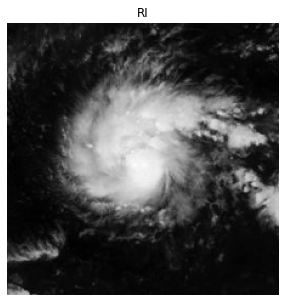

/content/drive/MyDrive/Earth/randomforest/TRAIN/RI/2005060100-200504-GOE9-1.h5.jpg


In [ ]:
classes = ['RI','NORMAL']

# 画像とラベルを出力

plt.figure(figsize = (5, 5))

plt.axis("off")   # メモリを非表示
plt.title(classes[S_LABEL1[0]], color='black')
plt.imshow(x_train[0])

plt.show()

print(file_name_train[0])

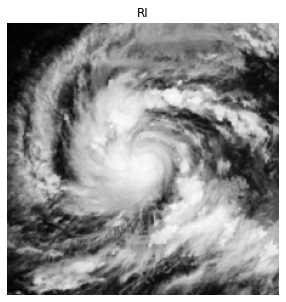

/content/drive/MyDrive/Earth/randomforest/TEST/RI/2015080200-201513-HMW8-1.h5.jpg


In [ ]:
plt.figure(figsize = (5, 5))

plt.axis("off")
plt.title(classes[S_LABEL2[0]], color='black')
plt.imshow(x_test[0])

plt.show()
print(file_name_test[0])

# UMAPを使う

In [ ]:
# pip installする際に、--target(-t)オプションで、インストール先を my-site-packagesに指定
!pip install scprep phate umap-learn
# -t $package_path

     |████████████████████████████████| 104 kB 6.7 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 416 kB 44.6 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 1.8 MB 37.6 MB/s 
     |████████████████████████████████| 1.1 MB 40.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=6594761019c5af0a73755ce3758ef9729f3fb00a439a507a631c2f913af8e9d7
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=3ed9a152f30de090ca591c2d4d46ef8fa0fa2753a10ca7b4c99344804e1b558f
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:

import numpy as np


data = np.array(np.concatenate([x_train,x_test]))
labels = np.array(np.concatenate([y_train,y_test]))
file_name = np.array(np.concatenate([file_name_train,file_name_test]))


print(data.shape)
print(labels.shape)
print(file_name.shape)

(99, 224, 224, 3)
(99, 2)
(99,)


In [ ]:

# y_trainをone hotから数値に変換

Y_train = []
for i in range(len(labels)):
  a = np.argmax(labels[i])
  Y_train.append(a)

y_train = np.array(Y_train)
print(y_train.shape)

# # y_testをone hotから数値に変換

# Y_test = []
# for i in range(len(y_test)):
#   a = np.argmax(y_test[i])
#   Y_test.append(a)

# y_test = np.array(Y_test)
# print(y_test.shape)


(99,)


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


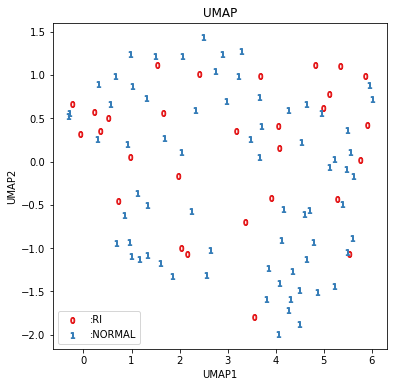

In [ ]:
# ライブラリーをインポート
import umap
import matplotlib.pyplot as plt


# UMAPをかけたデータを入れるため
train_X = []
# test_X = []

def plot_sklearn_umap():
    X_train = (np.array(data)).reshape(99,-1)
    umap_op = umap.UMAP(random_state=200)
    proj_train = umap_op.fit_transform(X_train)
    # # testデータにもUMAPをかける
    # X_test = (np.array(x_test)).reshape(25,-1)
    # proj_test = umap_op.fit_transform(X_test)
    train_X.append(proj_train)
    # test_X.append(proj_test)

    cmp = plt.get_cmap("Set1")
    plt.figure(figsize=(6,6))
    for i in range(2):
        select_flag = y_train == i
        plt_latent = proj_train[select_flag, :]
        plt.scatter(plt_latent[:,0], plt_latent[:,1], color=cmp(i), marker=f"${i}$")
    plt.title("UMAP")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.legend((":RI",":NORMAL"),loc="lower left", fontsize=10)
    # plt.vlines(3.1, -2.0, 1.5, colors='red', linestyle='dashed', linewidth=2)
    plt.show()

if __name__ == "__main__":
    plot_sklearn_umap()

In [ ]:
train_X = np.asarray(train_X[0])
# test_X = np.asarray(test_X[0])
print(train_X.shape)
print(type(train_X))
# print(test_X.shape)
# print(type(test_X))

(99, 2)
<class 'numpy.ndarray'>


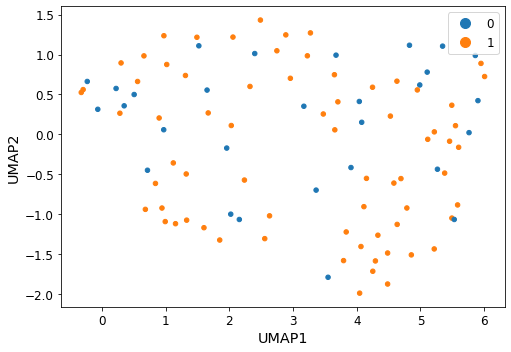

In [ ]:
import scprep
scprep.plot.scatter2d(train_X, c=y_train,
                      figsize=(8,5), legend_anchor=(1,1), ticks=True, label_prefix='UMAP')

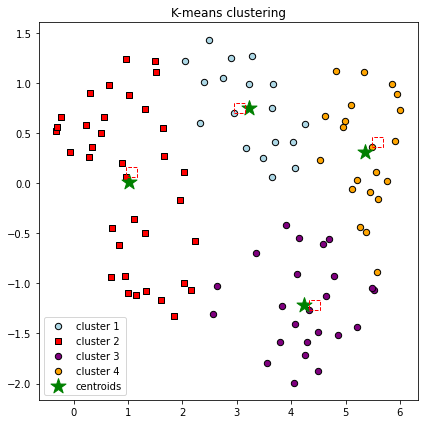

In [ ]:
from pandas.core.common import random_state
import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering
from matplotlib import patches

#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5))
f, ax1= plt.subplots(1, 1, figsize=(6,6))
km = sklearn.cluster.KMeans(n_clusters=4, random_state=0)
y_km = km.fit_predict(train_X)

ax1.scatter(train_X[y_km==0,0],
            train_X[y_km==0,1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax1.legend()

ax1.scatter(train_X[y_km==1,0],
            train_X[y_km==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')

ax1.legend()

ax1.scatter(train_X[y_km==2,0],
            train_X[y_km==2,1],
            c='purple',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 3')
ax1.legend()



ax1.scatter(train_X[y_km==3,0],
            train_X[y_km==3,1],
            c='orange',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 4')

ax1.legend()


ax1.scatter(km.cluster_centers_[:,0],   # km.cluster_centers_には各クラスターのセントロイドの座標が入っている
                    km.cluster_centers_[:,1],
                    s=250,
                    marker='*',
                    c='green',
                    label='centroids')


ax1.legend()
# 青グループ
# ax1.scatter(train_X[51][0],   # km.cluster_centers_には各クラスターのセントロイドの座標が入っている
#                     train_X[51][1],
#                     s=250,
#                     marker='p',
#                     c='yellow',
#                     label='centroids')

r = patches.Rectangle( (2.9577992, 0.7021845), 0.2, 0.1, fill=False, facecolor="pink", edgecolor="red", linestyle="--")
ax1.add_patch(r)

# 赤グループ
# ax1.scatter(train_X[24][0],   # km.cluster_centers_には各クラスターのセントロイドの座標が入っている
#                     train_X[24][1],
#                     s=250,
#                     marker='p',
#                     c='yellow',
#                     label='centroids')

r = patches.Rectangle( (0.96891946, 0.0573861), 0.2, 0.1, fill=False, facecolor="pink", edgecolor="red", linestyle="--", )
ax1.add_patch(r)


r = patches.Rectangle( (4.3325667, -1.2644207), 0.2, 0.1, fill=False, facecolor="pink", edgecolor="red", linestyle="--")
ax1.add_patch(r)


r = patches.Rectangle( (5.493386, 0.36463812), 0.2, 0.1, fill=False, facecolor="pink", edgecolor="red", linestyle="--")
ax1.add_patch(r)



# 閾値の線を加える
#ax1.vlines(3.1, -2.0, 1.5, colors='red', linestyle='dashed', linewidth=2, label='border')


ax1.set_title('K-means clustering')




# # AgglomerativeClustering
# ac = AgglomerativeClustering(n_clusters=2,
#                              affinity='euclidean',
#                              linkage='complete')

# y_ac = ac.fit_predict(train_X)
# ax2.scatter(train_X[y_ac==0,0],
#             train_X[y_ac==0,1],
#             c='lightblue',
#             edgecolor='black',
#             marker='o',
#             s=40,
#             label='cluster 1')

# ax2.scatter(train_X[y_ac==1,0],
#             train_X[y_ac==1,1],
#             c='red',
#             edgecolor='black',
#             marker='s',
#             s=40,
#             label='cluster 2')

# ax2.set_title('Agglomerative clustering')


# plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 重心の位置 0：青，　1：赤, 2：紫, 3：橙色
km.cluster_centers_

array([[ 3.2250812 ,  0.7486389 ],
       [ 1.0105126 ,  0.00781006],
       [ 4.2361083 , -1.2130493 ],
       [ 5.359488  ,  0.30942434]], dtype=float32)

In [ ]:
# クラスタ内SSE値が小さいほど「歪みのない（クアスタリングがうまくいっている）良いモデル」と言える
print ('Distortion: %.2f'% km.inertia_)

Distortion: 76.79


In [ ]:
# 最近傍点を探す
from sklearn.neighbors import NearestNeighbors
import numpy as np

extractor = NearestNeighbors(metric='euclidean', n_neighbors=4)
extractor.fit(train_X)

distances, indexes = extractor.kneighbors(km.cluster_centers_)

print('最近傍点\n')
for k, v in enumerate(indexes[0]):
    print(k, '--->',  train_X[v])


print('\n最近傍点の距離\n')
for k, v in enumerate(distances[0]):
    print(k, '--->', v)

最近傍点

0 ---> [3.2249594  0.98398393]
1 ---> [2.9577992 0.7021845]
2 ---> [3.169793   0.35193035]
3 ---> [3.6497924  0.74696016]

最近傍点の距離

0 ---> 0.2353450375236495
1 ---> 0.2712889353322141
2 ---> 0.4005427486701629
3 ---> 0.4247145452481811


In [ ]:
# # 4クラスタリング　重心に一番近い画像の位置
# # 青
# train_X[72]
# array([2.9577992, 0.7021845], dtype=float32)

# #　赤
# train_X[24]
# array([0.96891946, 0.0573861 ], dtype=float32)

# #　紫
# train_X[88]
# array([ 4.3325667, -1.2644207], dtype=float32)

# #　橙色
# train_X[71]
# array([5.493386  , 0.36463812], dtype=float32)

In [ ]:
# 2クラスタリング　重心に一番近い画像の位置

# indexes[0]
# array([51, 94])
# indexes[1]
# array([24, 64])

#　青
#train_X[51]
#array([ 4.694704 , -0.5547556], dtype=float32)
#train_X[94]
#array([ 4.5836782 , -0.61114925], dtype=float32)

# 赤
# train_X[24]
# array([0.96891946, 0.0573861 ], dtype=float32)
# train_X[64]
# array([1.6673425 , 0.26806676], dtype=float32)

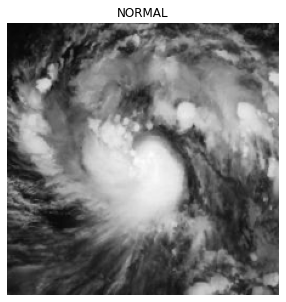

/content/drive/MyDrive/Earth/randomforest/TRAIN/NORMAL/2014100412-201419-MTS2-1.h5.jpg


In [ ]:
# 青
classes = ['RI','NORMAL']

# 画像とラベルを出力

plt.figure(figsize = (5, 5))

plt.axis("off")   # メモリを非表示
plt.title(classes[np.argmax(labels, axis=1)[72]], color='black')
plt.imshow(data[72])

plt.show()

print(file_name[72])

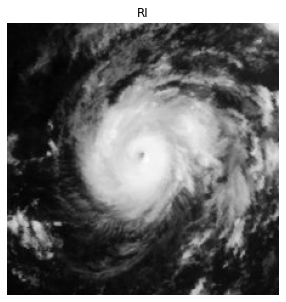

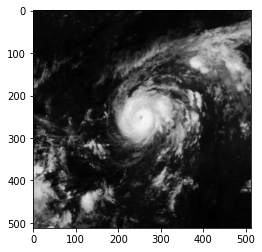

/content/drive/MyDrive/Earth/randomforest/TRAIN/RI/2014080700-201413-MTS2-1.h5.jpg


In [ ]:
import cv2
# 赤
classes = ['RI','NORMAL']

# 画像とラベルを出力

plt.figure(figsize = (5, 5))

plt.axis("off")   # メモリを非表示
plt.title(classes[np.argmax(labels, axis=1)[24]], color='black')
plt.imshow(data[24])

plt.show()

img = cv2.imread(file_name[24]) #BGRで取得.
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #BGRをRGBに変換.
cv2.imwrite("/content/drive/trim.jpg",img) 
plt.imshow(img_RGB)
plt.show()
print(file_name[24])

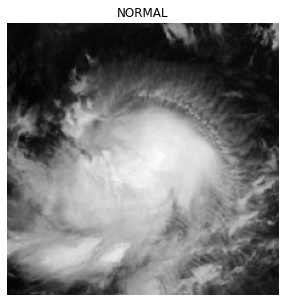

/content/drive/MyDrive/Earth/randomforest/TEST/NORMAL/2015101600-201525-HMW8-1.h5.jpg


In [ ]:
# 紫
classes = ['RI','NORMAL']

# 画像とラベルを出力

plt.figure(figsize = (5, 5))

plt.axis("off")   # メモリを非表示
plt.title(classes[np.argmax(labels, axis=1)[88]], color='black')
plt.imshow(data[88])

plt.show()

print(file_name[88])

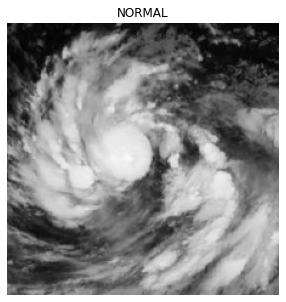

/content/drive/MyDrive/Earth/randomforest/TRAIN/NORMAL/2014093012-201418-MTS2-1.h5.jpg


In [ ]:
# 橙色
classes = ['RI','NORMAL']

# 画像とラベルを出力

plt.figure(figsize = (5, 5))

plt.axis("off")   # メモリを非表示
plt.title(classes[np.argmax(labels, axis=1)[71]], color='black')
plt.imshow(data[71])

plt.show()

print(file_name[71])

# データの形成

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Earth/randomforest/ベストトラックデータ.csv', index_col=0)
df

,月,日,時間,季節,季節ラベル,夜ラベル,号数,風速,強度,クラス,強度ラベル,年月,緯度,経度,正規緯度,正規経度,気圧,強度ラベル(P),発達期間,発達ラベル
年,,,,,,,,,,,,,,,,,,,,
2005,1,17,12,冬,0,0,1,50,表現しない,200501,0,2005/01/17/12,157,1496,0.270600,0.506034,985,1,162,0
2005,4,24,6,春,0,0,3,85,非常に強い,200503,2,2005/04/24/06,141,1308,0.423237,0.240964,945,2,162,0
2005,6,1,0,春,0,1,4,50,表現しない,200504,0,2005/06/01/00,108,1428,0.187381,0.604599,985,1,24,1
2005,6,2,0,春,0,1,4,80,強い,200504,1,2005/06/02/00,112,1385,0.302905,0.356928,945,2,24,1
2005,7,13,12,夏,1,0,5,55,表現しない,200505,0,2005/07/13/12,217,1471,0.369747,0.543174,980,1,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,10,15,18,秋,1,0,21,95,非常に強い,201621,2,2016/10/15/18,158,1218,0.493776,0.105422,935,2,30,0
2016,10,15,18,秋,1,0,22,50,表現しない,201622,0,2016/10/15/18,97,1400,0.168489,0.642788,985,1,42,0
2016,10,17,12,秋,1,0,22,95,非常に強い,201622,2,2016/10/17/12,138,1345,0.410788,0.296687,945,2,42,0


In [ ]:
df = df[df['強度ラベル(P)']==1]
df

,月,日,時間,季節,季節ラベル,夜ラベル,号数,風速,強度,クラス,強度ラベル,年月,緯度,経度,正規緯度,正規経度,気圧,強度ラベル(P),発達期間,発達ラベル
年,,,,,,,,,,,,,,,,,,,,
2005,1,17,12,冬,0,0,1,50,表現しない,200501,0,2005/01/17/12,157,1496,0.270600,0.506034,985,1,162,0
2005,6,1,0,春,0,1,4,50,表現しない,200504,0,2005/06/01/00,108,1428,0.187381,0.604599,985,1,24,1
2005,7,13,12,夏,1,0,5,55,表現しない,200505,0,2005/07/13/12,217,1471,0.369747,0.543174,980,1,48,0
2005,8,20,18,夏,1,0,11,50,表現しない,200511,0,2005/08/20/18,216,1413,0.368125,0.625243,985,1,18,1
2005,8,28,0,夏,1,1,13,50,表現しない,200513,0,2005/08/28/00,183,1388,0.313992,0.658689,985,1,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,9,30,18,秋,1,0,18,55,表現しない,201618,0,2016/09/30/18,154,1360,0.265556,0.694658,985,1,54,0
2016,10,9,18,秋,1,0,20,55,表現しない,201620,0,2016/10/09/18,240,1473,0.406737,0.540240,980,1,18,1
2016,10,14,12,秋,1,0,21,55,表現しない,201621,0,2016/10/14/12,138,1259,0.238533,0.810042,980,1,30,0


In [ ]:
x = df[df['気圧']==985]

In [ ]:
# train = df.loc[2005 : 2014]
# len(train)

In [ ]:
# test = df.loc[2015 : 2016]
# len(test)

In [ ]:
Train_X = pd.DataFrame({'longitude' : df['緯度']/10, 'latitude' : df['経度']/10, 'night' : df['夜ラベル'], 'season' : df['季節ラベル'], 'umap1' : train_X[: , 0], 'umap2' : train_X[: , 1]})
len(Train_X)

99

In [ ]:
Train_X.head()

,longitude,latitude,night,season,umap1,umap2
年,,,,,,
2005,15.7,149.6,0,0,0.504389,0.498922
2005,10.8,142.8,1,0,0.347453,0.357146
2005,21.7,147.1,0,1,-0.232269,0.662579
2005,21.6,141.3,0,1,2.398581,1.012457
2005,18.3,138.8,1,1,4.078379,0.150898


In [ ]:
# Test_X = pd.DataFrame({'longitude' : test['正規緯度'], 'latitude' : test['正規経度'], 'night' : test['夜ラベル'], 'season' : test['季節ラベル'], 'umap1' : test_X[: , 0], 'umap2' : test_X[: , 1]})
# len(Test_X)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# a, b, c, d = train_test_split(Train_X, y_train, test_size=0.2, train_size=0.8, shuffle=True, random_state=200)
# e, f, g, h = train_test_split(Test_X, y_test, test_size=0.2, train_size=0.8, shuffle=True, random_state=200)
# train_X = np.array(np.concatenate([a, e]))
# test_X = np.array(np.concatenate([b, f]))
# train_Y = np.array(np.concatenate([c, g]))
# test_Y = np.array(np.concatenate([d, h]))
train_X, test_X, train_Y, test_Y= train_test_split(Train_X, y_train, test_size=0.2, train_size=0.8, shuffle=True, random_state=200)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(79, 6)
(20, 6)
(79,)
(20,)


In [ ]:
print(np.count_nonzero(train_Y == 0))
print(np.count_nonzero(train_Y == 1))
print(np.count_nonzero(test_Y == 0))
print(np.count_nonzero(test_Y == 1))

24
55
5
15


## 訓練データのumapをmatplotで可視化してみる

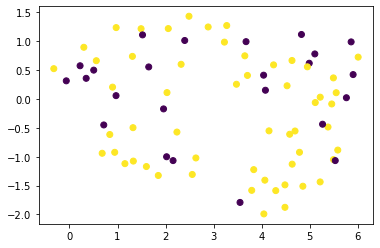

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



plt.scatter(train_X['umap1'],train_X['umap2'], c=[train_Y])
plt.show()

#RandomForest

In [ ]:
# 訓練データ
print(train_X.shape)
print(type(train_X))
# テストデータ
print(test_X.shape)
print(type(test_X))

(79, 6)
<class 'pandas.core.frame.DataFrame'>
(20, 6)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

In [ ]:
# 識別モデルの構築
random_forest = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=42)
random_forest.fit(train_X, train_Y)

# 予測値算出
y_pred = random_forest.predict(test_X)

#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_X, train_Y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_Y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 0.8987341772151899
Accuracy: 0.75


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.78      0.93      0.85        15

    accuracy                           0.75        20
   macro avg       0.64      0.57      0.57        20
weighted avg       0.71      0.75      0.71        20



Text(91.68, 0.5, 'true value')

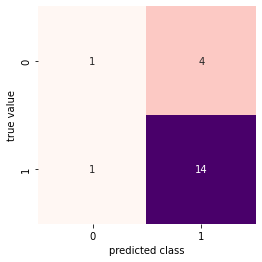

In [ ]:
#confusion matrix
mat = confusion_matrix(test_Y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [ ]:
# X = pd.DataFrame({'longitude' : train_X[: ,0], ' latitude' : train_X[: ,1], 'night' : train_X[: ,2], 'season' : train_X[: ,3], 'umap1' : train_X[: ,4], 'umap2' : train_X[: , 5]})

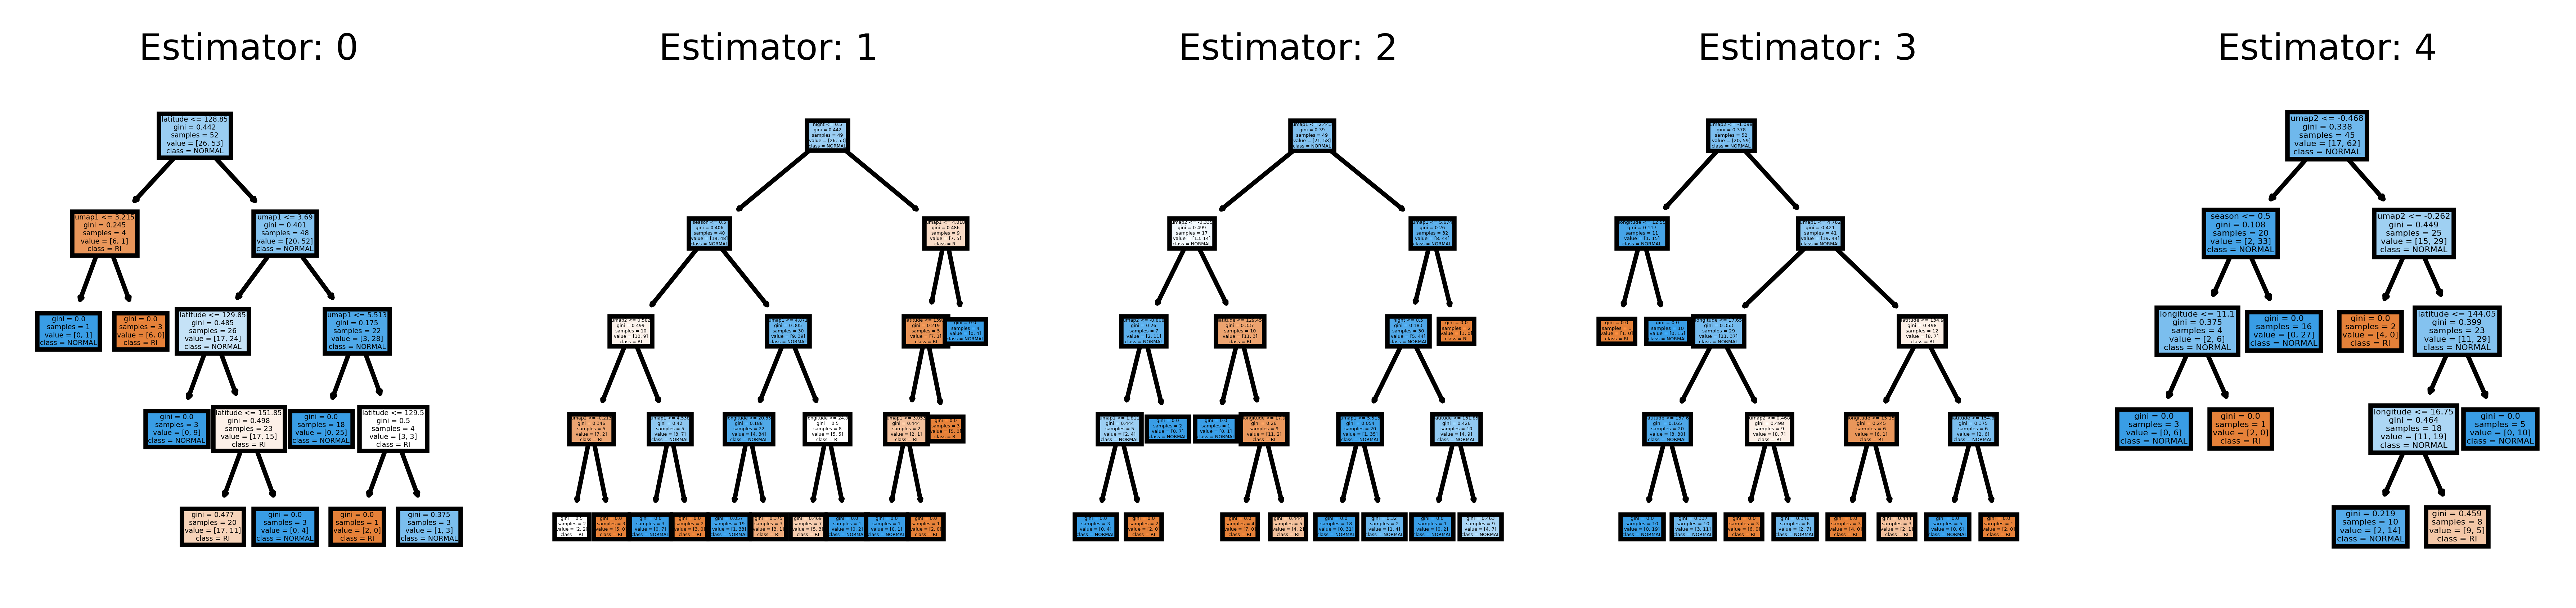

In [ ]:
import matplotlib.pyplot as plt

from sklearn import tree
import pandas as pd

classes = ['RI', 'NORMAL']
# This may not the best way to view each estimator as it is small

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(random_forest[index],
                   feature_names = train_X.columns, 
                   class_names=classes,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 8)
fig.savefig('rf_5trees.png')

In [ ]:
# 変数の重要度を可視化
importance = pd.DataFrame({ '変数' :train_X.columns, '重要度' :random_forest.feature_importances_})
importance

,変数,重要度
0,longitude,0.207031
1,latitude,0.215269
2,night,0.034477
3,season,0.036838
4,umap1,0.247785
5,umap2,0.258600


In [ ]:
#どのデータを、どのクラスに分類したのか。
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## GridSearch

In [ ]:
# ランダムフォレストのパラメータの候補をいくつか決める
parameters = {
    'n_estimators' :[3,5,7,10,30,50],#作成する決定木の数
    'random_state' :[7,42,200,250],# 240　急速発達を当てるモデル 250が一番いい
    'max_depth' :[3,4],#決定木の深さ
    'min_samples_leaf': [2,5,10,20],#分岐し終わったノードの最小サンプル数
    'min_samples_split': [2,5,10,20]#決定木が分岐する際に必要なサンプル数
}
# リーブワンアウト loo sklearn
#グリッドサーチを使う
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=2)

#学習モデルを作成
clf.fit(train_X, train_Y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [3, 5, 7, 10, 30, 50],
                         'random_state': [7, 42, 200, 250]})

In [ ]:
#精度を確認
best_clf = clf.best_estimator_ #ここにベストパラメータの組み合わせが入っています
print('score: {:.2%}'.format(best_clf.score(train_X, train_Y)))
y_pred = clf.predict(test_X)
print('score: {:.2%}'.format(best_clf.score(test_X, test_Y)))

score: 68.35%
score: 80.00%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.82      0.93      0.87        15

    accuracy                           0.80        20
   macro avg       0.75      0.67      0.69        20
weighted avg       0.78      0.80      0.78        20



Text(91.68, 0.5, 'true value')

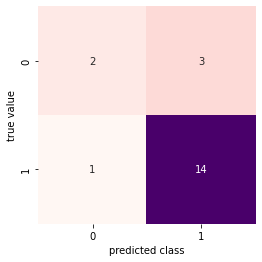

In [ ]:
#confusion matrix
mat = confusion_matrix(test_Y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [ ]:
# X = pd.DataFrame({'正規緯度' : train_X[: ,0], '正規経度' : train_X[: ,1], '夜ラベル' : train_X[: ,2], '時期' : train_X[: ,3], 'umap1' : train_X[: ,4], 'umap2' : train_X[: , 5]})

In [ ]:
best_clf

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=3,
                       random_state=250)

In [ ]:
train_X.shape

(79, 6)

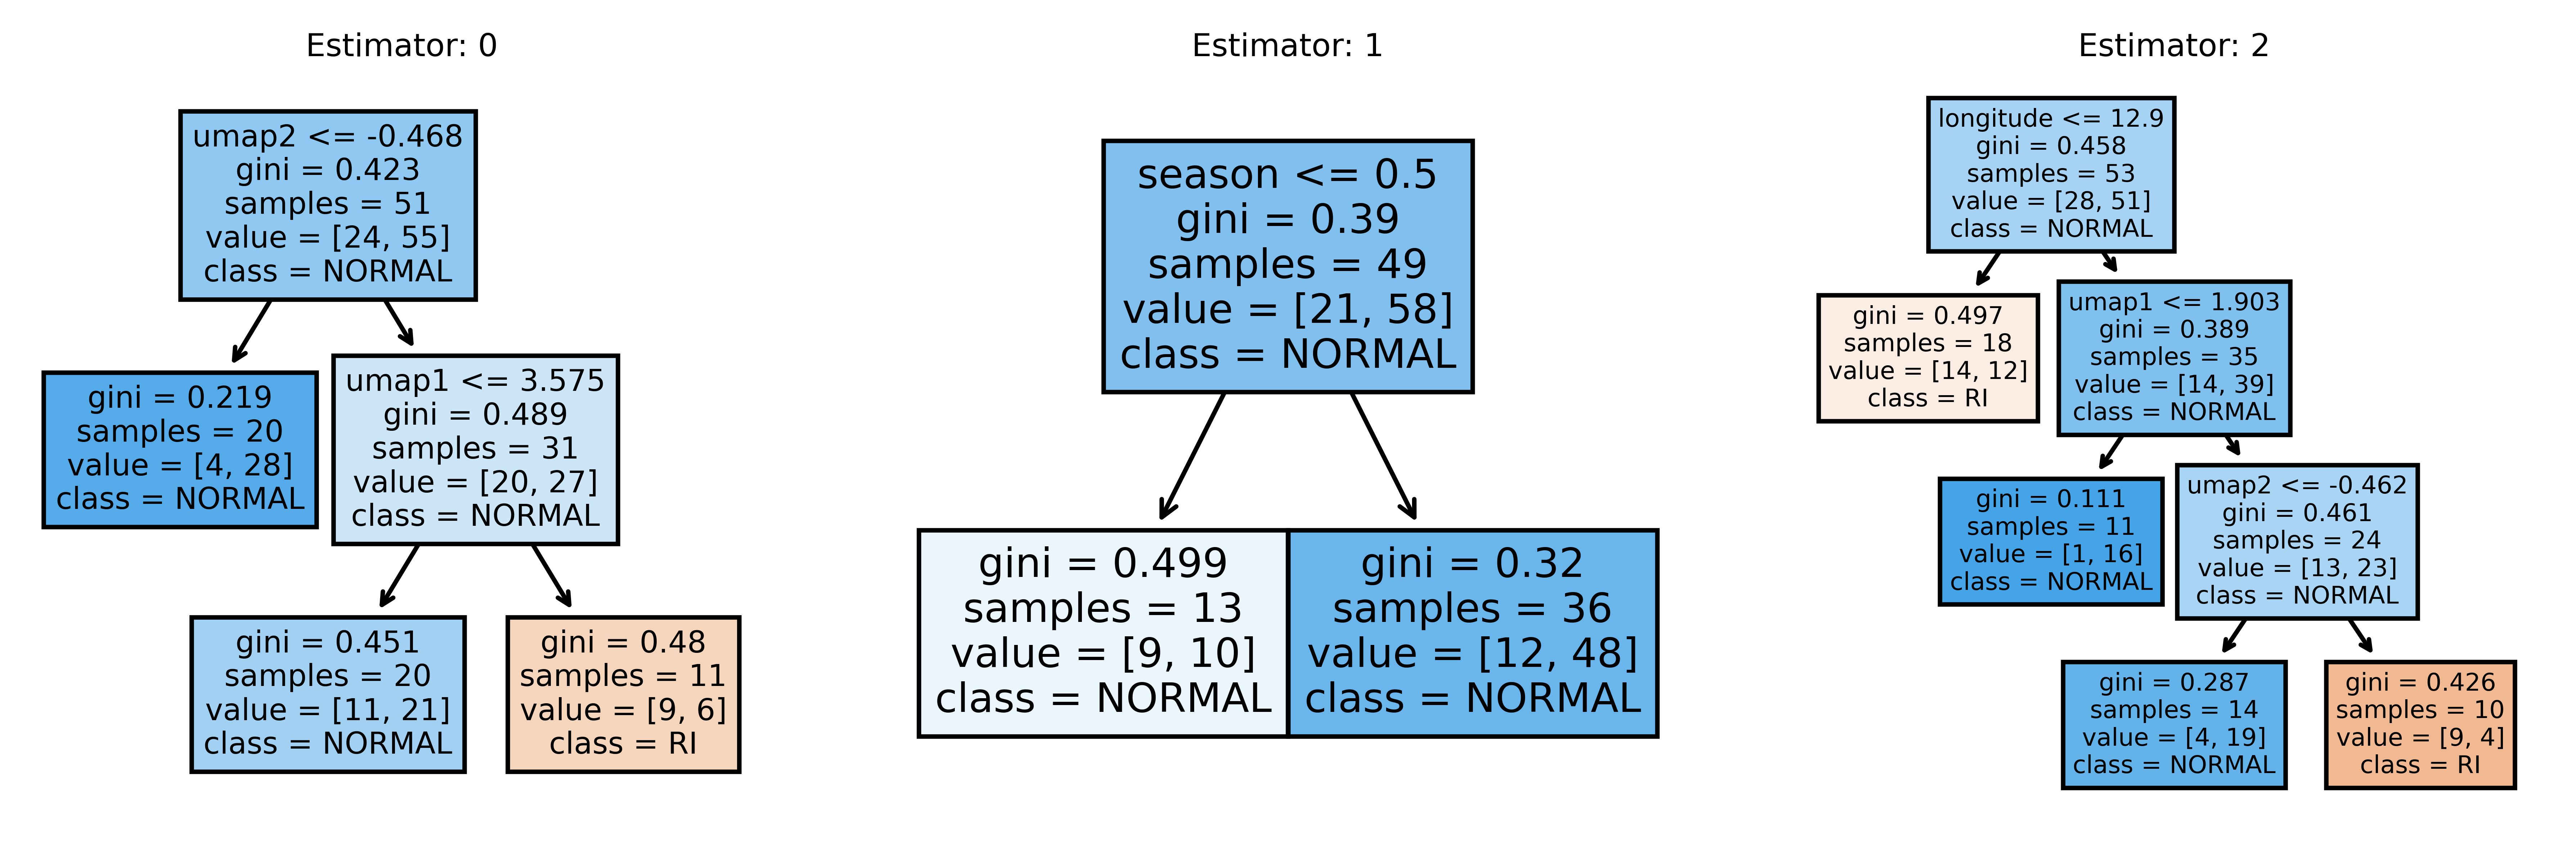

In [ ]:
import matplotlib.pyplot as plt

from sklearn import tree
import pandas as pd

classes = ['RI', 'NORMAL']
# This may not the best way to view each estimator as it is small

fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,3), dpi=900)
for index in range(0, 3):
    tree.plot_tree(best_clf[index],
                   feature_names = train_X.columns, 
                   class_names=classes,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 7)
fig.savefig('rf_5trees.png')

## 特徴量の重要度

In [ ]:
# 変数の重要度を可視化
importance = pd.DataFrame({ 'feature' :train_X.columns, 'importance' :best_clf.feature_importances_})
importance

,feature,importance
0,longitude,0.095118
1,latitude,0.000000
2,night,0.000000
3,season,0.333333
4,umap1,0.169992
5,umap2,0.401557


In [ ]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
  n_features = len(df)                              # 特徴量数(説明変数の個数) 
  df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
  f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
  plt.barh(range(n_features), f_importance_plot, align='center') 
  cols_plot = df_plot['feature'].values             # 特徴量の取得 
  plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
  plt.xlabel('Feature importance')                  # x軸のタイトル
  plt.ylabel('Feature')                             # y軸のタイトル

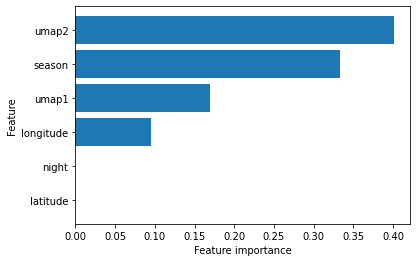

In [ ]:
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
# 特徴量重要度の可視化
plot_feature_importance(importance)